In [32]:
#WE WILL CALCULATE INTEGRAL USING THE MIDPOINTS OF RECTANGLES

from numpy import exp as exp
import matplotlib.pyplot as plt
import numpy as np


#Mathematical function that we are trying to integrate
f = lambda x: exp(-1*(x**2))


#This function takes as input a mathematical function, an intial x value, a terminal x value, the number of rectangles we
#are using to approximate our integral, and whether we want to plot the graph (it defaults to plotting the graph)
def MidpointRectangle(f, start, end, points, plot = 1):
    
    #Calculates the width of each rectangle
    deltax = (end-start)/points
    
    
                                      #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    area = np.empty([points], float)  #<Creates empty arrays to record the areas of each rectangle, the y values
    ybars = np.empty([points], float) #<that determine the height of each rectangle, and the x values
    xbars = np.empty([points], float) #<that form the endpoints of each rectangle
                                      #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    
    
    
    #This for loop calculates the x values that form the intervals on which the rectangles lie, determines the midpoint of 
    #each interval, calculates height and area of the rectangle, and records the information in their respective arrays
    for n in range(points):
        
        x1 = start + (n * deltax) #endpoints of intervals
        
        xn = x1 + (deltax/2) #midpoints of each interval
        
        area[n] = (deltax)*f(xn) #area of rectangle
        
        ybars[n] = f(xn) #heights of rectangles
        
        xbars[n] = xn #endpoints of retangles
        
        
    
    #Generates x and y values for the graph of our mathematical function
    x = np.linspace(start,end, points)
    y = f(x)
    
    
    
    #Graphs the function with the rectangles
    if plot == 1:
        plt.figure(figsize=(15,15))
        plt.xlim([start,end])
        plt.plot(x,y)
        plt.title('Midpoint Rule (Rectangles)', size = 42)
        plt.xlabel('x', size = 42)
        plt.ylabel('$e^{-x^2}$', size = 42)
        plt.bar(xbars , ybars, deltax, edgecolor = 'black', align = 'center')
        plt.show()
        print('The area is' , sum(area),'.')
    


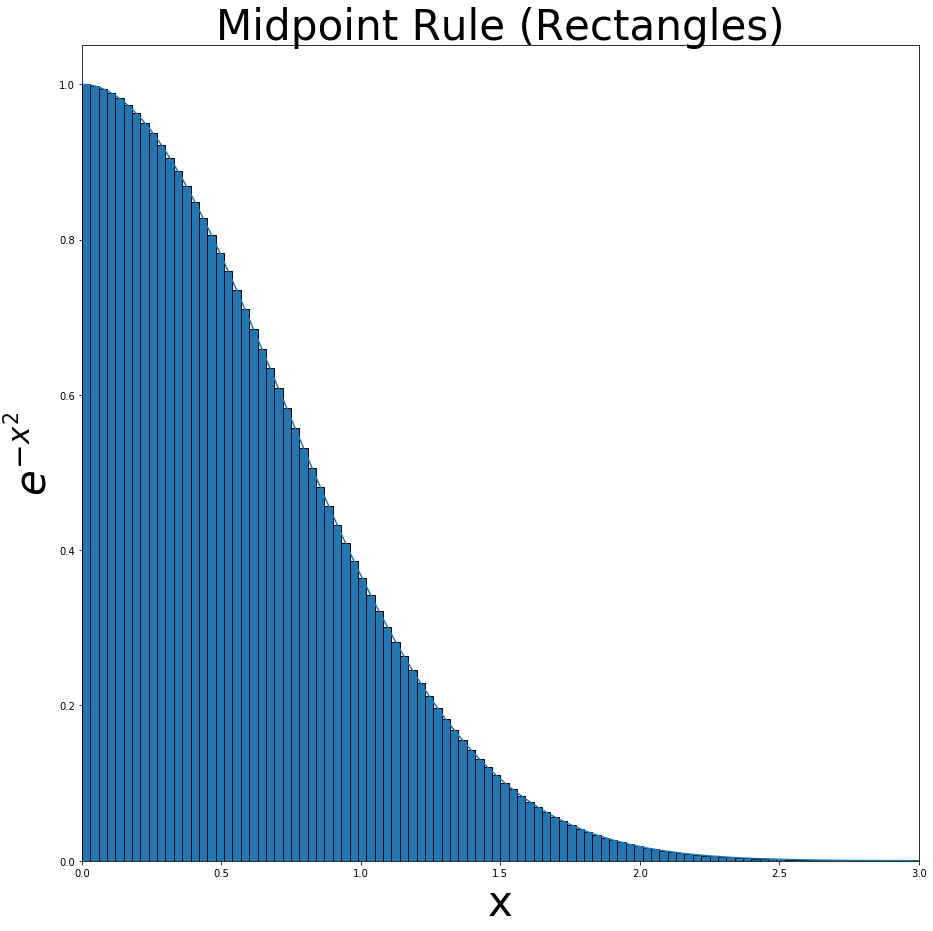

The area is 0.8862073760048715 .


In [33]:
MidpointRectangle(f, 0, 3, 100)

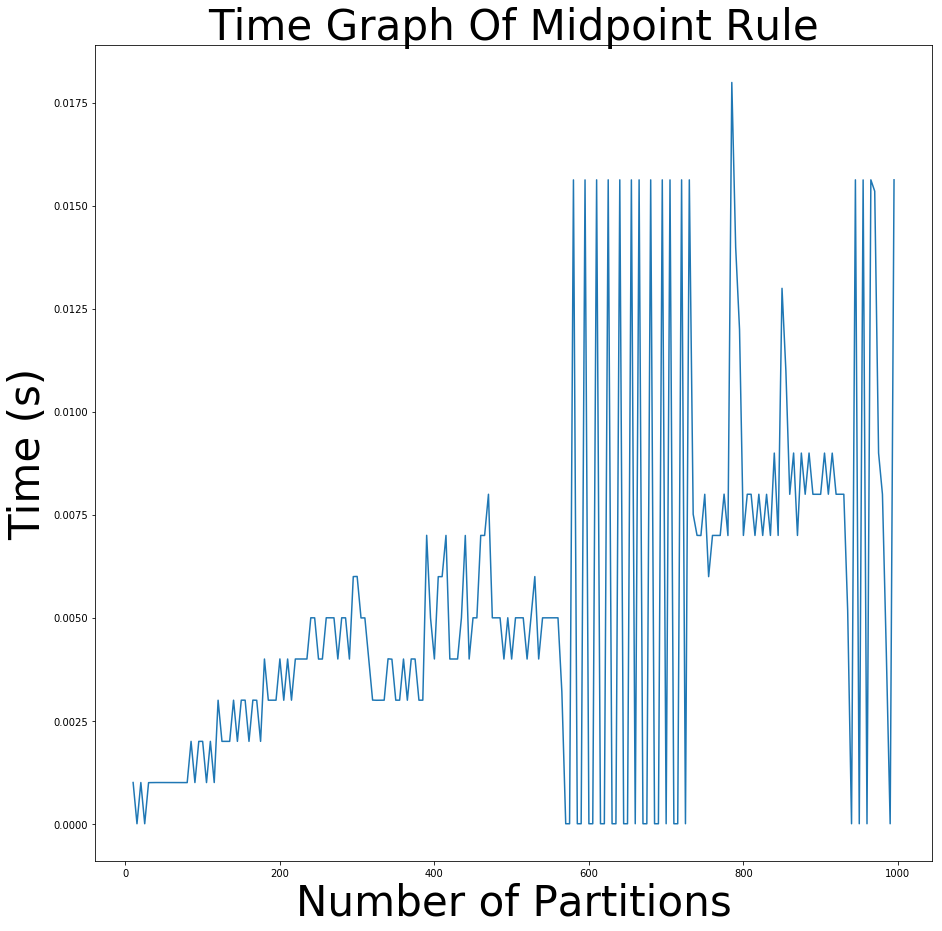

In [7]:
#WE CALCULATE TIME GRAPH FOR MIDPOINT RULE

import time


xt = range(10,1000,5) #Creates different values of N

yt = [] #Empty array used to record the times it takes to run the program at different values of N



#For each value of N in xt, we record the time it takes to run the program and add it in the yt array
for n in xt:
    t1 = time.time()
    MidpointRectangle(f, 0, 3, n, 0)
    t2 = time.time()
    yt.append(t2-t1)

    
    
#Creates time graph
plt.figure(figsize=(15,15))
plt.plot(xt,yt)
plt.title('Time Graph Of Midpoint Rule', size = 42)
plt.xlabel('Number of Partitions', size = 42)
plt.ylabel('Time (s)', size = 42)
plt.show()

In [28]:
#WE WILL CALCULATE THE INTEGRAL USING TRAPEZOIDS

from numpy import exp as exp
import matplotlib.pyplot as plt
import numpy as np


#Mathematical function that we are trying to integrate
f = lambda x: exp(-1*(x**2))



#This function takes as input a mathematical function, an intial x value, a terminal x value, the number of trapezoids we
#are using to approximate our integral, and whether we want to plot the graph (it defaults to plotting the graph)
def Trapezoid(f, start, end, points, plot = 1):
    
    #Calculates the width of each rectangle
    deltax = (end-start)/points
    
    #An empty array used to record the areas of each trapezoid
    area = np.empty([points], float)
    
    
    #This for loop calculates the x values that form the intervals on which the trapezoids lie, determines the height of 
    #each trapezoid, calculates area of the trapezoid, and records the information in the area array
    for n in range(points):
        x1 = start + (n * deltax)
        x2 = start + (n+1)*deltax
        area[n] = (deltax/2)*(f(x1)+f(x2))
    
    
    #Generates x and y values for the graph of our mathematical function
    x = np.linspace(start,end, points + 1)
    y = f(x)
    
    
    #Graphs the function with the trapezoids
    if plot == 1:
        plt.figure(figsize=(15,15))
        plt.xlim([start,end])
        plt.plot(x,y,'r')
        y2 = np.array([0,0])
        plt.title('Trapezoid Rule', size = 42)
        plt.xlabel('x',size = 42)
        plt.ylabel('$e^{-x^2}$', size = 42)
        for i in range(points):
            x0 = x[i:i+2]
            y1 = y[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [x[i+1], x[i+1]], [0, y[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0) 
        plt.show()
        print('The area is', sum(area),'.')

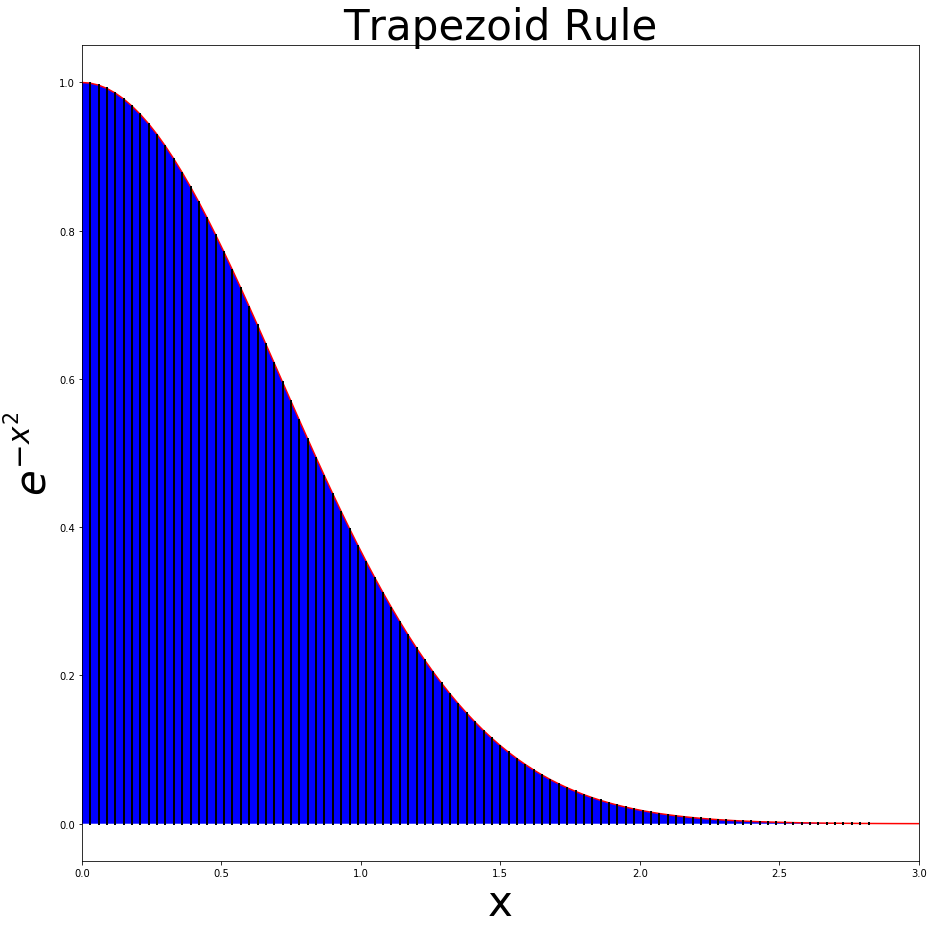

The area is 0.8862072927500886 .


In [29]:
Trapezoid(f,0,3,100)

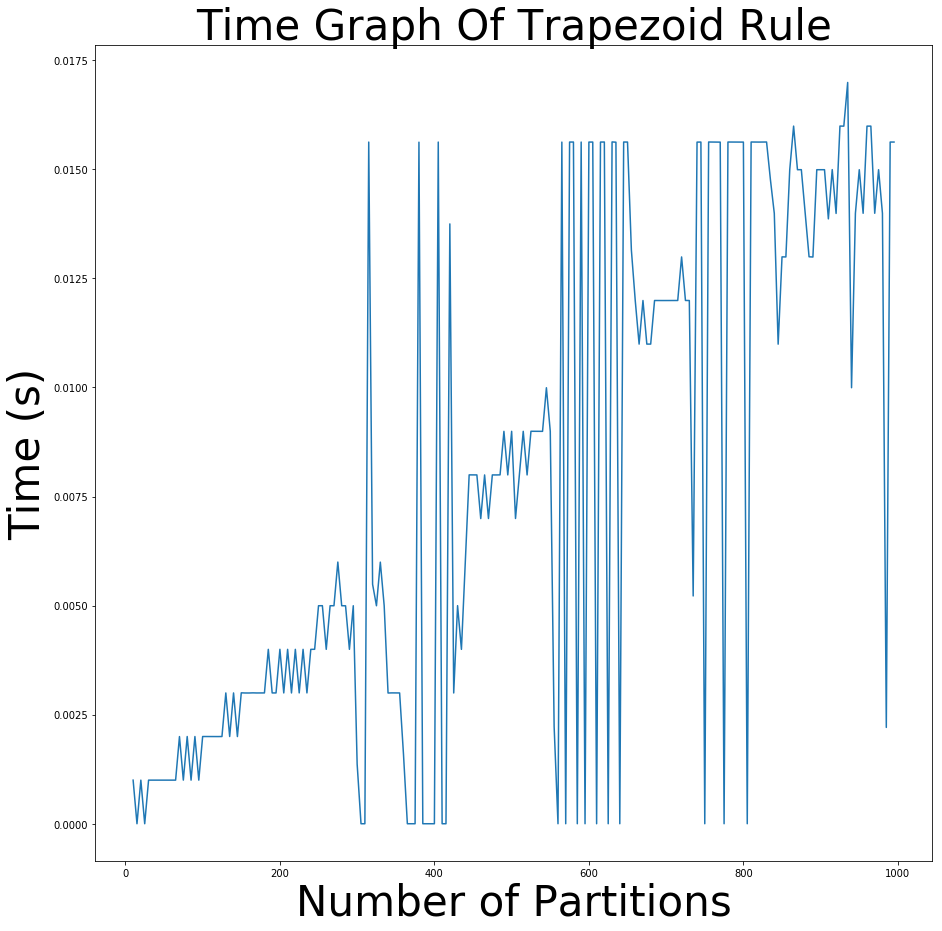

In [16]:
#WE CALCULATE THE TIME GRAPH FOR TRAPEZOIDAL RULE

import time


xt = range(10,1000,5) #Creates different values of N
yt = [] #Empty array used to record the times it takes to run the program at different values of N


#For each value of N in xt, we record the time it takes to run the program and add it in the yt array
for i in xt:
    t1 = time.time()
    Trapezoid(f, 0, 3, i, 0)
    t2 = time.time()
    yt.append(t2-t1)


#Creates time graph
plt.figure(figsize=(15,15))
plt.plot(xt,yt)
plt.title('Time Graph Of Trapezoid Rule', size = 42)
plt.xlabel('Number of Partitions', size = 42)
plt.ylabel('Time (s)', size = 42)
plt.show()

In [34]:
#WE WILL CALCULATE INTEGRAL USING SIMPSON'S RULE

from numpy import exp as exp
import matplotlib.pyplot as plt
import numpy as np


f = lambda x: exp(-1*(x**2))



def Simpson(f, start, end, points, plot = 1):
    
    #Calculates the width of each rectangle
    deltax = (end-start)/points
    
    #An empty array used to record the areas of each trapezoid
    area = np.empty([points], float)
    
    #Generates x and y values for the graph of our mathematical function
    x = np.linspace(start,end, points + 1)
    y = f(x)
    
    
    #This for loop applies Simpson's rule to determine which numbers we add up to calculate the area
    for n in range(points):
        if n == 0:
            area[n] = f(x[n])
        elif n == points:
            area[n] = f(x[points])
        elif n % 2 == 1:
            area[n] = 4*f(x[n])
        elif n % 2 == 0:
            area[n] = 2*f(x[n])
    
    
    #Graphs the mathematical function and colors the region of the graph that represents the area that we are trying to calculate
    if plot == 1:
        y0 = np.zeros(points+1)
        plt.figure(figsize=(15,15))
        plt.xlim([start,end])
        plt.plot(x,y)
        plt.title('Simpson\'s Rule', size = 42)
        plt.xlabel('x', size = 42)
        plt.ylabel('$e^{-x^2}$',size = 42)
        plt.fill_between(x, y0, y, where=y>=y0, facecolor='pink')
        plt.show()
        print('The area is' , (deltax/3)*sum(area),'.')

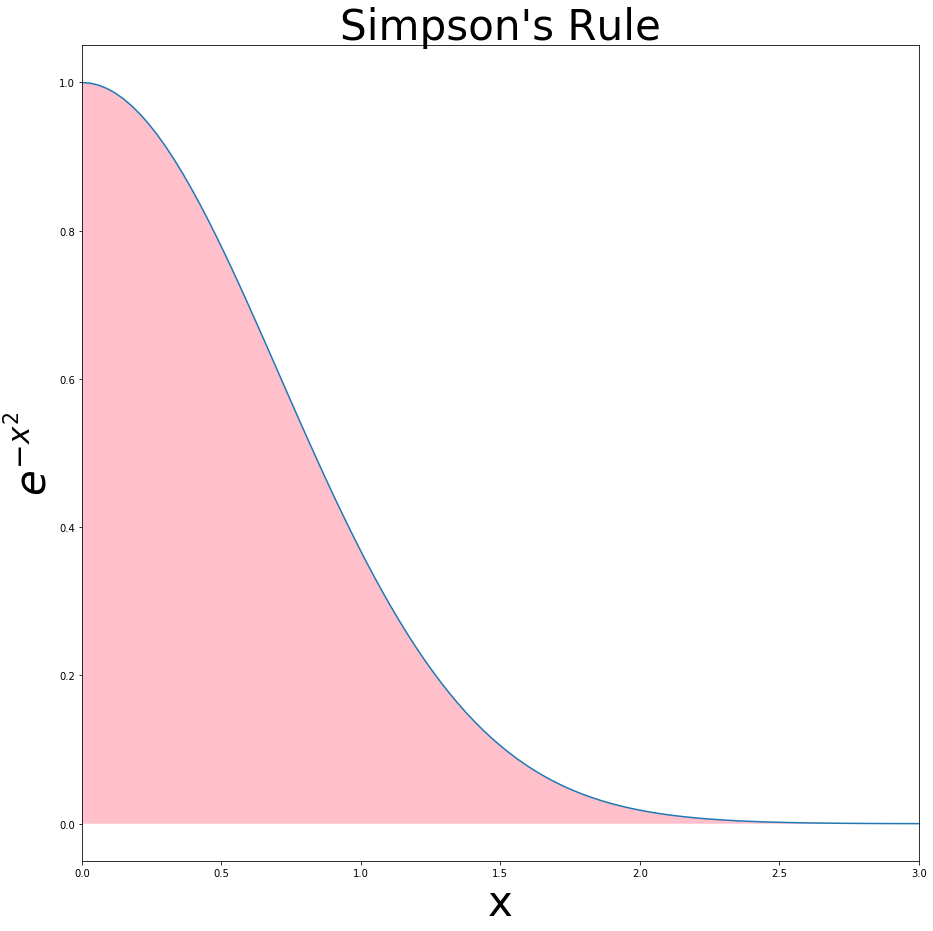

The area is 0.8862061140617453 .


In [35]:
Simpson(f, 0, 3, 100)

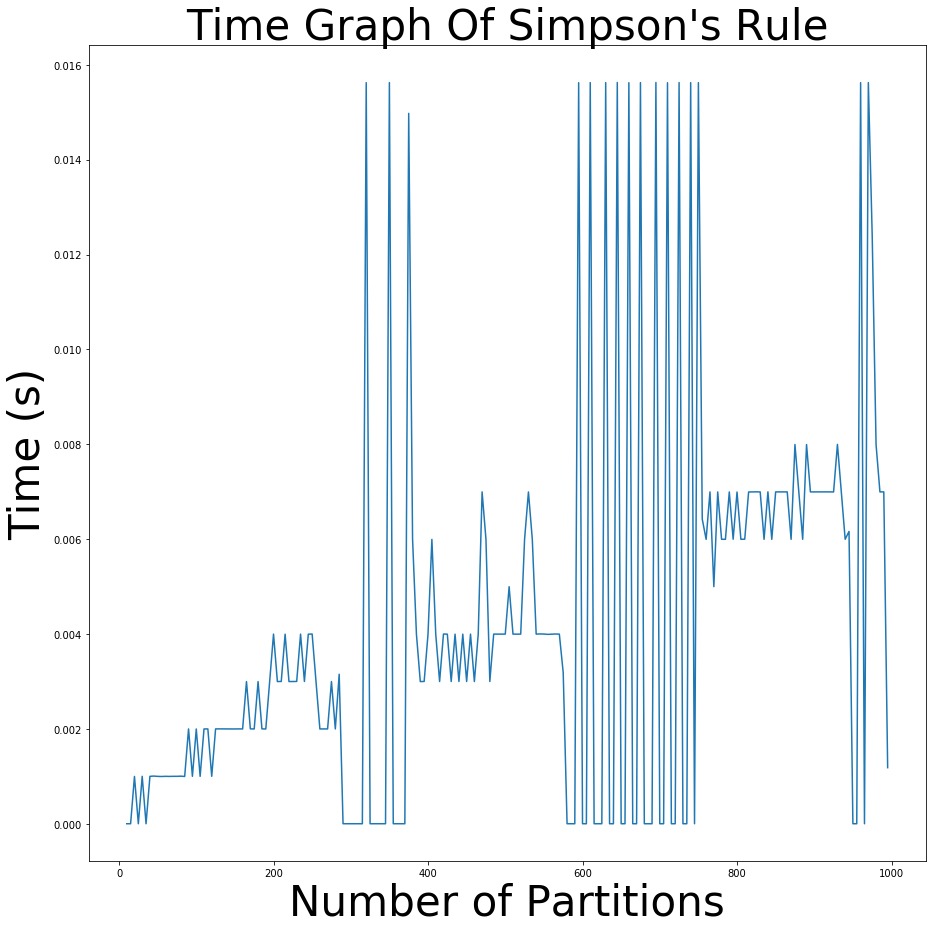

In [23]:
#WE CALCULATE THE TIME GRAPH OF SIMPSON'S RULE

import time


xt = range(10,1000,5) #Creates different values of N
yt = [] #Empty array used to record the times it takes to run the program at different values of N


#For each value of N in xt, we record the time it takes to run the program and add it in the yt array
for i in xt:
    t1 = time.time()
    Simpson(f, 0, 3, i, 0)
    t2 = time.time()
    yt.append(t2-t1)

    
#Creates time graph
plt.figure(figsize=(15,15))
plt.plot(xt,yt)
plt.title('Time Graph Of Simpson\'s Rule', size = 42)
plt.xlabel('Number of Partitions', size = 42)
plt.ylabel('Time (s)', size = 42)
plt.show()